In [98]:
%matplotlib inline
# Import Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

### Reflect Tables into SQLAlchemy ORM ###

In [99]:
# Python SQL Toolkit And Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [100]:
# Create Engine To hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [101]:
# Reflect An Existing Database Into A New Model
Base = automap_base()

# Use Base Class To Reflect Database Tables
Base.prepare(autoload_with=engine)

In [102]:
# View All Classes That Automap Found
Base.classes.keys()

['measurement', 'station']

In [103]:
# Save References To Each Table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [104]:
# Create Session (Link) From Python To The DB
session = Session(engine)

### Exploratory Precipitation Analysis ###

In [123]:
# Find Most Recent Date In Data Set
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

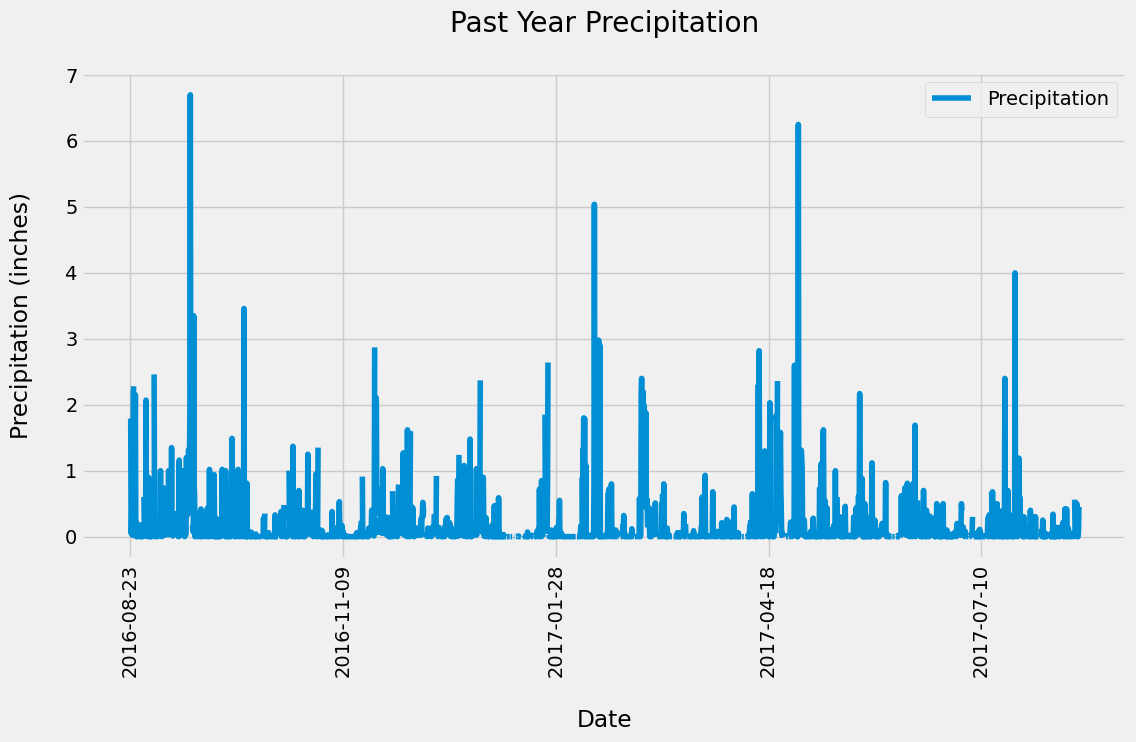

In [124]:
# Calculation For Date One Year From Most Recent Date In Dataset
most_recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d').date()
query_past_year = most_recent_date - dt.timedelta(days=365)

# Query To Retrieve Date And Precipitation Scores
query_past_year_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_past_year).all()

# Save Query Results As Pandas DataFrame, Explicitly Set Column Names
past_year_precipitation_df = pd.DataFrame(query_past_year_precipitation,
                                          columns=['Date', 'Precipitation'])
past_year_precipitation_df.set_index(past_year_precipitation_df['Date'],
                                     inplace=True)

# Sort Dataframe By Date
past_year_percipitation_df = past_year_precipitation_df.sort_index()

# Use Pandas Plotting With Matplotlib To Plot Data
past_year_percipitation_df.plot(figsize=(12, 6))
plt.xlabel('\nDate')
plt.ylabel('Precipitation (inches)\n')
plt.title('Past Year Precipitation\n')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [44]:
# Using Pandas To Calculate Summary Statistics For Precipitation Data
past_year_percipitation_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Exploratory Station Analysis ###

In [89]:
# Query To Calculate Total Number Of Stations In Dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [126]:
# Query To Find Most Active Stations In Descending Order
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [127]:
# Using Most Active Station From Previous Query, Calculation For Lowest, Highest, Average Temperature
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

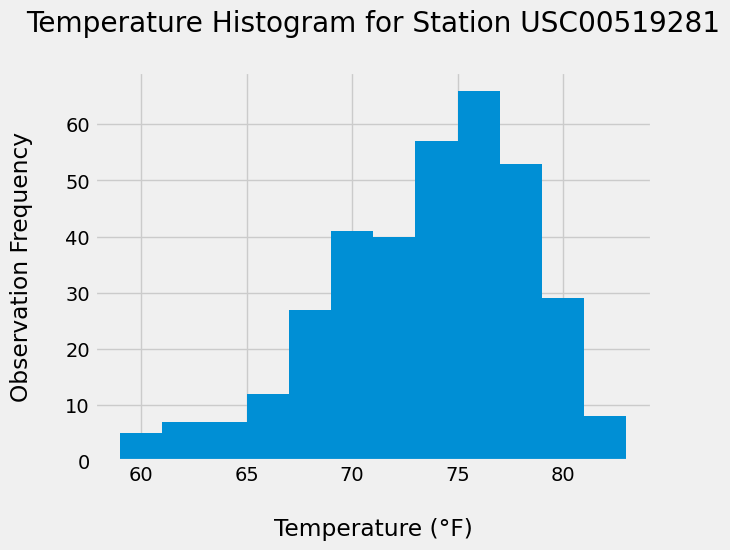

In [132]:
# Query Last 12 Months Of Temperature Observation Data For Most Active Station, Plot Results As Histogram
most_active_station = session.query(Measurement.tobs).\
                        filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= query_past_year).all()
most_active_station_temperatures = [temp[0] for temp in most_active_station]
plt.hist(most_active_station_temperatures, bins=12)
plt.xlabel('\nTemperature (°F)')
plt.ylabel('Observation Frequency\n')
plt.title('Temperature Histogram for Station USC00519281\n')
plt.show()

### Close Session ###

In [133]:
# Close Session
session.close()